<a href="https://colab.research.google.com/github/M-Mag25/Hamoye-StageA-Project/blob/main/Stage_D_Lesson_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [65]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
mnist = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
print("Training data: {}, {}".format(train_images.shape, train_labels.shape))
print("Test data: {}, {}".format(test_images.shape, test_labels.shape))
class_labels = np.unique(train_labels)
print("There are {} classes in the dataset. They are: {}".format(len(class_labels), class_labels))

Training data: (60000, 28, 28), (60000,)
Test data: (10000, 28, 28), (10000,)
There are 10 classes in the dataset. They are: [0 1 2 3 4 5 6 7 8 9]


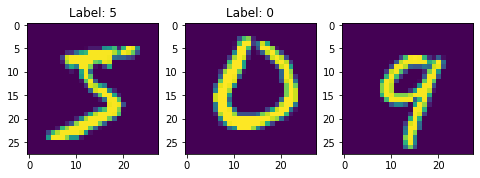

In [66]:
#VISUALIZE THE DATA

plt.figure(figsize=(8, 5))

plt.subplot(1,3,1)
plt.imshow(train_images[0])
plt.title("Label: {}".format(train_labels[0]))
plt.subplot(1,3,2)
plt.imshow(train_images[2500])
plt.title("Label: {}".format(train_labels[2500]))
plt.subplot(1,3,3)
plt.imshow(test_images[12])
plt.show()

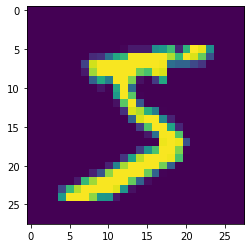

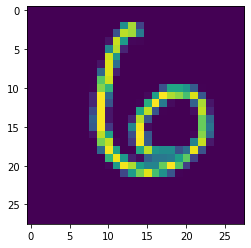

In [67]:
# As usual, we scale our dataset to range between 0 and 1. In this dataset, the pixel values
# Dividing the data by 255 scales to the required range

train_images = train_images / 255.0
test_images = test_images / 255.0
plt.imshow(train_images[0])
plt.show()

plt.imshow(test_images[100])
plt.show()

In [68]:
x_train = train_images[0:50000]
x_val = train_images[50000:]
y_train = train_labels[0:50000]
y_val = train_labels[50000:]
print("x_train: {}".format(x_train.shape)) # prints x_train: (50000, 28, 28)
print("x_val: {}".format(x_val.shape)) # prints x_val: (10000, 28, 28)
print("y_train: {}".format(y_train.shape)) #prints y_train: (50000,)
print("y_val: {}".format(y_val.shape)) #prints y_val: (10000,)


x_train: (50000, 28, 28)
x_val: (10000, 28, 28)
y_train: (50000,)
y_val: (10000,)


In [69]:
#Reshape data from 28 * 28 array to a single array

new_dimension = np.prod(train_images.shape[1:])
x_train = x_train.reshape(x_train.shape[0], new_dimension)
x_val = x_val.reshape(x_val.shape[0], new_dimension)
test_images = test_images.reshape(test_images.shape[0], new_dimension)
print("x_train: {}".format(x_train.shape)) #prints x_train: (50000, 784)
print("x_val: {}".format(x_val.shape)) #prints x_val: (10000, 784)
print("test_images: {}".format(test_images.shape)) #prints test_images: (10000, 784)

x_train: (50000, 784)
x_val: (10000, 784)
test_images: (10000, 784)


In [72]:
#Encode labels to categorical variables

from tensorflow.keras.utils import to_categorical
no_labels = 10
y_train = to_categorical(y_train, no_labels)
y_val = to_categorical(y_val, no_labels)
y_test = to_categorical(test_labels, no_labels)


#Activation functions and Neural Networks hyperparameters
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior() 

X = tf.placeholder(tf.float32, [None, new_dimension])
Y = tf.placeholder(tf.float32, [None, no_labels])

# create model architecture

def multilayer_perceptron(x, no_classes, first_layer_neurons=256, second_layer_neurons=128):
# first layer
 first_weight = tf.Variable(tf.random_uniform([new_dimension, first_layer_neurons]))
 first_bias = tf.Variable(tf.zeros([first_layer_neurons]))
 first_layer_output = tf.nn.relu(tf.add(tf.matmul(x, first_weight), first_bias))
 # second layer
 second_weight = tf.Variable(tf.random_uniform([first_layer_neurons,second_layer_neurons]))
 second_bias = tf.Variable(tf.zeros([second_layer_neurons]))
 second_layer_output = tf.nn.relu(tf.add(tf.matmul(first_layer_output, second_weight),
 second_bias))
 # output layer
 final_weight = tf.Variable(tf.random_uniform([second_layer_neurons, no_classes]))
 final_bias = tf.Variable(tf.zeros([no_classes]))
 logits = tf.add(tf.matmul(second_layer_output, final_weight), final_bias)
 return logits

In [73]:
#Call the multilayer perception function
logits = multilayer_perceptron(X, no_labels)
learning_rate = 0.01

#we define the loss and optimiser for the network
loss_op = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=Y))
optimiser = tf.train.AdamOptimizer(learning_rate=learning_rate)
train_op = optimiser.minimize(loss_op)

#initialise the variables
init = tf.global_variables_initializer()
epochs = 20
batch_size = 1000
iteration = len(x_train) // batch_size

